In [1]:
from __future__ import division  # so that 1/2 == 0.5, and not 0

from math import sqrt, fabs
from numpy import pi
import numpy as np
import copy

from diagonalizer_graphene import SimpleNamespace, LandauEnergyTh, FinalizedSystem_1D, diagonalize_1D, \
pSweep_1D, spectrum_plot_1D, density_plot_1D

In [2]:
#I do not put the NNN hoppings too high, since otherwise there appear additional bulk states with the energy equal to the
#energy of the Dirac node
tNNDefault = 1.0
tNNNDefault = 0.3
#The lengths are in unit of the nearest-neighbour distance of the original 2D setup
ParametersDefault = SimpleNamespace( LatticeSpacing = sqrt(3)/2, tNN = tNNDefault, tNNN = tNNNDefault, \
                                    WavefunctionComponents = 2, lBinv2 = 0., x_shift=0., \
                                    EigenvectorsCount = 50, EnergyPrecision = 10**(-3), \
                                    FermiEnergy = -3.*tNNNDefault, FermiVelocity = 3.*tNNDefault/2., \
                                    py = 0. )

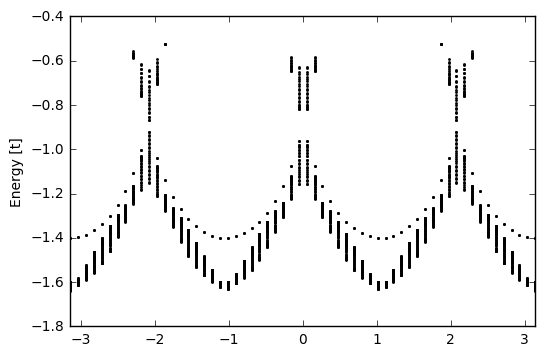

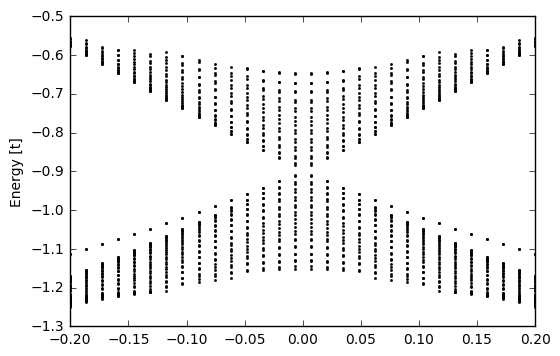

In [4]:
params = copy.copy(ParametersDefault)

SitesCount_X = 255
sweepCount = 30

fsys1D = FinalizedSystem_1D(SitesCount_X, params)

pyMin, pyMax = -pi, pi
evals, evecs = pSweep_1D(fsys1D, params, pyMin, pyMax, sweepCount*2)
spectrum_plot_1D( evals, pyMin, pyMax, sweepCount*2)
#Zoom in
#The indication of two-fold degeneracy can be now resolved
#The degeneracy seems to correspond to presence of two Dirac cones (at K and at K'):
#they share the same momentum, p^y = 0
pyMin, pyMax = -0.2, 0.2
evals, evecs = pSweep_1D(fsys1D, params, pyMin, pyMax, sweepCount)
spectrum_plot_1D( evals, pyMin, pyMax, sweepCount)

del params, SitesCount_X, sweepCount, fsys1D, pyMin, pyMax, evals, evecs

## 500 sites seems to be the optimal number for the required precision (that is, relative precision of $10^{-3}$ for the energy)

In [5]:
params = copy.copy(ParametersDefault)
params.py = 0.0

print('The expected energy of the Dirac cone is', params.FermiEnergy)
fsys1D = FinalizedSystem_1D(255, params)
evals, evecs = diagonalize_1D(fsys1D, params)
print([energy for energy in evals if energy > params.FermiEnergy - 2.*params.EnergyPrecision][0])

fsys1D = FinalizedSystem_1D(511, params)
evals, evecs = diagonalize_1D(fsys1D, params)
print([energy for energy in evals if energy > params.FermiEnergy - 2.*params.EnergyPrecision][0])

fsys1D = FinalizedSystem_1D(2023, params)
evals, evecs = diagonalize_1D(fsys1D, params)
print([energy for energy in evals if energy > params.FermiEnergy - 2.*params.EnergyPrecision][0])

SitesCount_X = 511

del params, fsys1D, evals, evecs

The expected energy of the Dirac cone is -0.8999999999999999
-0.888023605298
-0.901071217805
-0.901386071691


In [6]:
params = copy.copy(ParametersDefault)
pyVicinity1, pyVicinity2 = 0.01, 0.02
params.EnergyPrecision = 10**(-5)

params.py = pyVicinity1
fsys1D = FinalizedSystem_1D(511, params)
evals, evecs = diagonalize_1D(fsys1D, params)
EnergyNodeVicinity1 = [energy for energy in evals if energy > params.FermiEnergy][0]

params.py = pyVicinity2
fsys1D = FinalizedSystem_1D(511, params)
evals, evecs = diagonalize_1D(fsys1D, params)
EnergyNodeVicinity2 = [energy for energy in evals if energy > params.FermiEnergy][0]

print((EnergyNodeVicinity2 - EnergyNodeVicinity1)/(pyVicinity2 - pyVicinity1), params.FermiVelocity)


#Decreasing the number of sought eigenvectors does not seem to affect the precision of the energy determination
params.EigenvectorsCount = 10
params.py = pyVicinity1
fsys1D = FinalizedSystem_1D(511, params)
evals, evecs = diagonalize_1D(fsys1D, params)
EnergyNodeVicinity1 = [energy for energy in evals if energy > params.FermiEnergy][0]

params.py = pyVicinity2
fsys1D = FinalizedSystem_1D(511, params)
evals, evecs = diagonalize_1D(fsys1D, params)
EnergyNodeVicinity2 = [energy for energy in evals if energy > params.FermiEnergy][0]

print((EnergyNodeVicinity2 - EnergyNodeVicinity1)/(pyVicinity2 - pyVicinity1), params.FermiVelocity)


params.EigenvectorsCount = 10
params.py = pyVicinity1
fsys1D = FinalizedSystem_1D(2023, params)
evals, evecs = diagonalize_1D(fsys1D, params)
EnergyNodeVicinity1 = [energy for energy in evals if energy > params.FermiEnergy][0]

params.py = pyVicinity2
fsys1D = FinalizedSystem_1D(2023, params)
evals, evecs = diagonalize_1D(fsys1D, params)
EnergyNodeVicinity2 = [energy for energy in evals if energy > params.FermiEnergy][0]

print((EnergyNodeVicinity2 - EnergyNodeVicinity1)/(pyVicinity2 - pyVicinity1), params.FermiVelocity)


del params, fsys1D, evals, evecs, pyVicinity1, pyVicinity2, EnergyNodeVicinity1, EnergyNodeVicinity2

1.46587527713 1.5
1.46587527713 1.5
1.51192643825 1.5


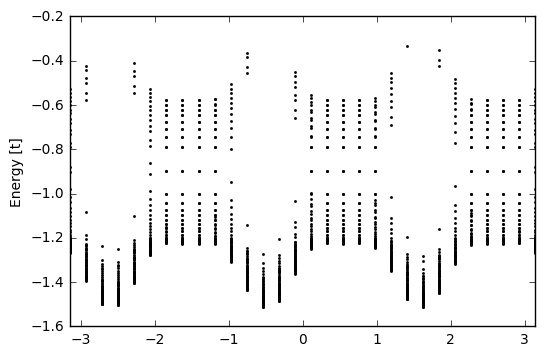

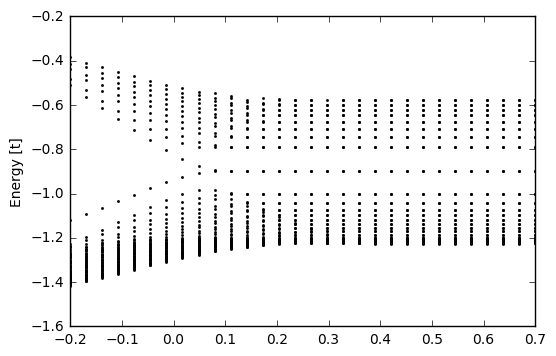

In [9]:
params = copy.copy(ParametersDefault)
params.lBinv2 = 1. / 20.**2

fsys1D = FinalizedSystem_1D(SitesCount_X, params)

evals, evecs = pSweep_1D(fsys1D, params, -pi, pi, 30)
spectrum_plot_1D(evals, -pi, pi, 30)

evals, evecs = pSweep_1D(fsys1D, params, -0.2, 0.7, 30)
spectrum_plot_1D(evals, -0.2, 0.7, 30)

del params, fsys1D, evals, evecs

## By increasing the magnetic field, the degeneracy of the $n=0$ Landau level increases from 2 to 4 (is it related to "Hofstadter" physics?)

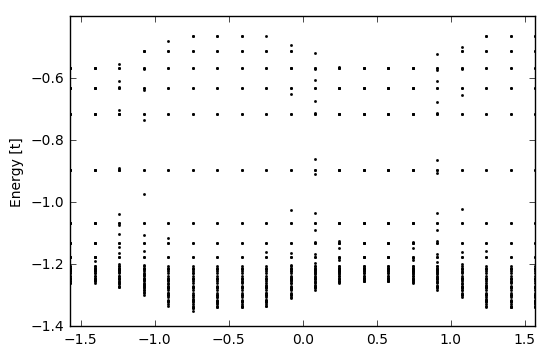

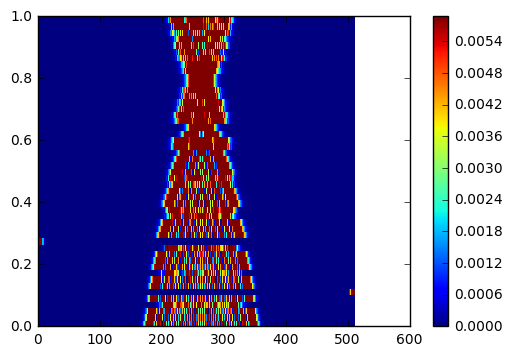

[-0.89530126441076163, -0.89530126441076152, -0.71355048478800043, -0.71355048478799821, -0.63161121951806232, -0.63161121951806054, -0.56712423571239312, -0.56712423571239245, -0.51179980377816703, -0.51179980377816525, -0.46241802348502475, -0.46241802348502348]


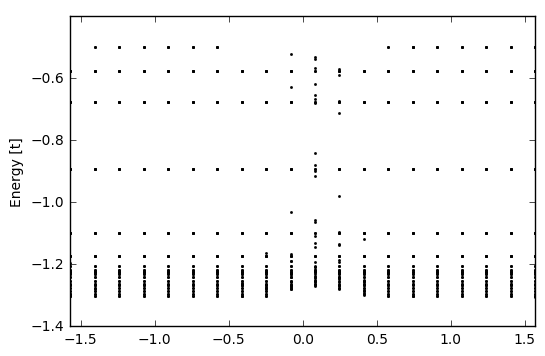

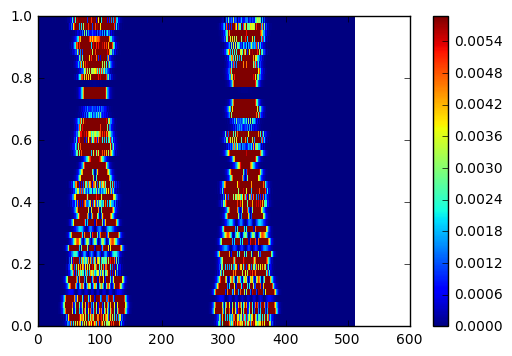

[-0.89330367140653433, -0.89330367140653422, -0.89330367140653399, -0.89330367140653388, -0.67522087010432474, -0.67522087010432263, -0.67522087010432119, -0.67522087010432119, -0.57566080264062292, -0.57566080264062136, -0.57566080264062114, -0.57566080264062081, -0.49717707765003938, -0.49717707765003855, -0.49717707765003771]


In [12]:
params = copy.copy(ParametersDefault)
params.lBinv2 = 0.007
fsys1D = FinalizedSystem_1D(SitesCount_X, params)
evals, evecs = pSweep_1D(fsys1D, params, -pi/2, pi/2, 20)
spectrum_plot_1D( evals, -pi/2, pi/2, 20)
#At the present stage, this parameter should be found by eye (for each given magnetic field)
params.py = -0.5
fsys1D = FinalizedSystem_1D(SitesCount_X, params)
evals, evecs = diagonalize_1D(fsys1D, params)
density_plot_1D(fsys1D, params, evecs)

AboveNodeEnergies = [energy for energy in evals if energy > params.FermiEnergy - 0.05*fabs(params.FermiEnergy)]
print(AboveNodeEnergies)


params = copy.copy(ParametersDefault)
params.lBinv2 = 0.01
fsys1D = FinalizedSystem_1D(SitesCount_X, params)
evals, evecs = pSweep_1D(fsys1D, params, -pi/2, pi/2, 20)
spectrum_plot_1D( evals, -pi/2, pi/2, 20)
#At the present stage, this parameter should be found by eye (for each given magnetic field)
params.py = -1.3
fsys1D = FinalizedSystem_1D(SitesCount_X, params)
evals, evecs = diagonalize_1D(fsys1D, params)
density_plot_1D(fsys1D, params, evecs)

AboveNodeEnergies = [energy for energy in evals if energy > params.FermiEnergy - 0.05*fabs(params.FermiEnergy)]
print(AboveNodeEnergies)


del params, fsys1D, evals, evecs, AboveNodeEnergies

## So we are limited to rather small magnetic fields, which become even smaller for the increased system size

## Fitting with one parameter ($\rho_1$) describes the results quite good

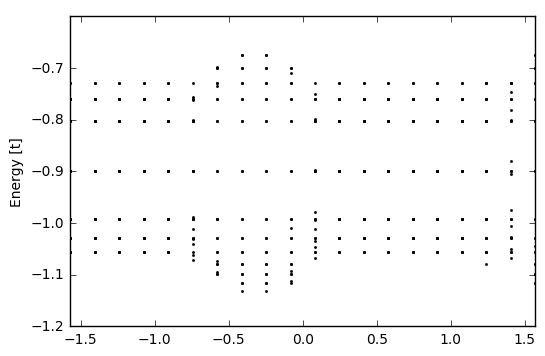

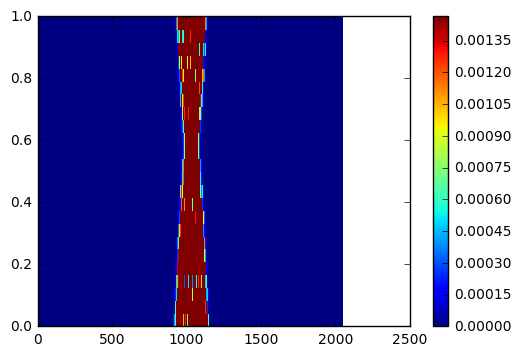

[-0.89865213935922961, -0.89865213935922961, -0.80249957637689673, -0.80249957637689651, -0.76064918363028422, -0.76064918363028322, -0.727987031640419, -0.72798703164041878, -0.70009665685631861, -0.70009665685631828, -0.67526587114965819, -0.6752658711496573]
[-1.1309779864471683, -1.1152806488101956, -1.1152806488101947, -1.0979412809716, -1.0979412809715998, -1.078437418895795, -1.0784374188957937, -1.0558902354671391, -1.0558902354671384, -1.0285875251272347, -1.0285875251272327, -0.99211280725330531, -0.99211280725330497]
Relative splittings of the energy levels are 0.0 2.22044604925e-16 1.33226762955e-15 2.22044604925e-16
The expected energy of the zeroth Landau level with rho_1 = 0 is -0.8999999999999999 while the numerical value is -0.898652139359
To fit this, we need rho_1 =  0.673930320385
Numerical value: -1.05589023547 Prediction with non-minimal coupling: -1.05623513144
Numerical value: -1.02858752513 Prediction with non-minimal coupling: -1.02877940646
Numerical value: -

In [8]:
params = copy.copy(ParametersDefault)
params.lBinv2 = 0.002
params.EigenvectorsCount = 25
params.EnergyPrecision = 10**(-5)
fsys1D = FinalizedSystem_1D(2048, params)
evals, evecs = pSweep_1D(fsys1D, params, -pi/2, pi/2, 20)
spectrum_plot_1D( evals, -pi/2, pi/2, 20)

#At the present stage, this parameter should be found by eye (for each given magnetic field)
params.py = -0.3
fsys1D = FinalizedSystem_1D(2048, params)
evals, evecs = diagonalize_1D(fsys1D, params)
density_plot_1D(fsys1D, params, evecs)


AboveNodeEnergies = [energy for energy in evals if energy > params.FermiEnergy - 0.05*fabs(params.FermiEnergy)]
print(AboveNodeEnergies)
AboveNodeEnergiesCut = [AboveNodeEnergies[0], AboveNodeEnergies[2], AboveNodeEnergies[4], AboveNodeEnergies[6]]

BelowNodeEnergies = [energy for energy in evals if energy <= params.FermiEnergy - 0.05*fabs(params.FermiEnergy)]
print(BelowNodeEnergies)
BelowNodeEnergiesCut = [BelowNodeEnergies[len(BelowNodeEnergies)-1], BelowNodeEnergies[len(BelowNodeEnergies)-3], \
                    BelowNodeEnergies[len(BelowNodeEnergies)-5]]

print('Relative splittings of the energy levels are', AboveNodeEnergies[0]/AboveNodeEnergies[1]-1., \
      AboveNodeEnergies[2]/AboveNodeEnergies[3]-1., AboveNodeEnergies[4]/AboveNodeEnergies[5]-1., \
      AboveNodeEnergies[6]/AboveNodeEnergies[7]-1.)

print('The expected energy of the zeroth Landau level with rho_1 = 0 is', LandauEnergyTh(0, params), \
      'while the numerical value is', AboveNodeEnergiesCut[0])
rho1_extr = (AboveNodeEnergiesCut[0] - LandauEnergyTh(0, params)) / params.lBinv2
print('To fit this, we need rho_1 = ', rho1_extr)

for i in reversed(range(len(BelowNodeEnergiesCut))):
    print('Numerical value:',BelowNodeEnergiesCut[i], 'Prediction with non-minimal coupling:', \
          LandauEnergyTh(-i-1, params, rho1 = rho1_extr))
for i in range(len(AboveNodeEnergiesCut)):
    print('Numerical value:', AboveNodeEnergiesCut[i], 'Prediction with non-minimal coupling:', \
          LandauEnergyTh(i, params, rho1 = rho1_extr))

del params, fsys1D, evals, evecs, AboveNodeEnergies, AboveNodeEnergiesCut, BelowNodeEnergies, BelowNodeEnergiesCut

## The run is made for another (smaller) magnetic field, to make sure that the effective parameter $\rho_1$ is an intrinsic parameter of the lattice model (in particular, that it does not depend on magnetic field)

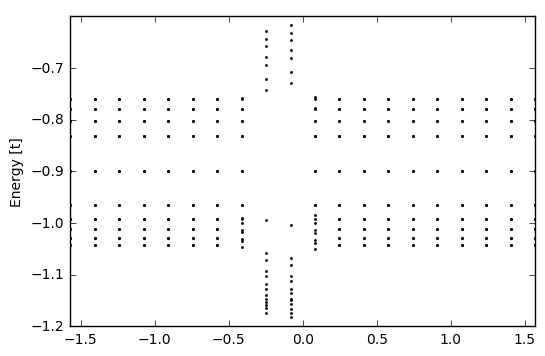

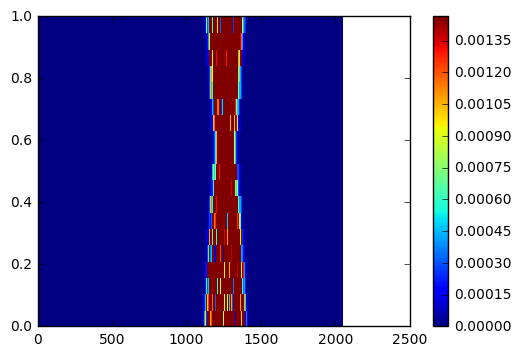

[-0.89932553460721731, -0.8993255346072172, -0.83159129756584882, -0.83159129756584838, -0.80250508652037489, -0.80250508652037467, -0.7798990802899054, -0.77989908028990529, -0.76065254487004075, -0.76065254487004075]
[-1.042995590091502, -1.0429955900914987, -1.0285809486894459, -1.0285809486894455, -1.012020224870964, -1.0120202248709638, -0.99210408642170622, -0.99210408642170589, -0.96571179725846124, -0.96571179725846112]
Numerical value: -1.01202022487 Prediction with non-minimal coupling: -1.01214787294
Numerical value: -0.992104086422 Prediction with non-minimal coupling: -0.992175002243
Numerical value: -0.965711797258 Prediction with non-minimal coupling: -0.965737563872
Numerical value: -0.899325534607 Prediction with non-minimal coupling: -0.89932606968
Numerical value: -0.831591297566 Prediction with non-minimal coupling: -0.831566714846
Numerical value: -0.80250508652 Prediction with non-minimal coupling: -0.802433555194
Numerical value: -0.77989908029 Prediction with no

In [9]:
params = copy.copy(ParametersDefault)
params.lBinv2 = 0.001
params.EigenvectorsCount = 20
params.EnergyPrecision = 10**(-5)
fsys1D = FinalizedSystem_1D(2048, params)
evals, evecs = pSweep_1D(fsys1D, params, -pi/2, pi/2, 20)
spectrum_plot_1D( evals, -pi/2, pi/2, 20)

#At the present stage, this parameter should be found by eye (for each given magnetic field)
params.py = -1.0
fsys1D = FinalizedSystem_1D(2048, params)
evals, evecs = diagonalize_1D(fsys1D, params)
density_plot_1D(fsys1D, params, evecs)


AboveNodeEnergies = [energy for energy in evals if energy > params.FermiEnergy - 0.05*fabs(params.FermiEnergy)]
print(AboveNodeEnergies)
AboveNodeEnergiesCut = [AboveNodeEnergies[0], AboveNodeEnergies[2], AboveNodeEnergies[4], AboveNodeEnergies[6]]

BelowNodeEnergies = [energy for energy in evals if energy <= params.FermiEnergy - 0.05*fabs(params.FermiEnergy)]
print(BelowNodeEnergies)
BelowNodeEnergiesCut = [BelowNodeEnergies[len(BelowNodeEnergies)-1], BelowNodeEnergies[len(BelowNodeEnergies)-3], \
                    BelowNodeEnergies[len(BelowNodeEnergies)-5]]

for i in reversed(range(len(BelowNodeEnergiesCut))):
    print('Numerical value:',BelowNodeEnergiesCut[i], 'Prediction with non-minimal coupling:', \
          LandauEnergyTh(-i-1, params, rho1 = rho1_extr))
for i in range(len(AboveNodeEnergiesCut)):
    print('Numerical value:', AboveNodeEnergiesCut[i], 'Prediction with non-minimal coupling:', \
          LandauEnergyTh(i, params, rho1 = rho1_extr))

del params, fsys1D, evals, evecs, AboveNodeEnergies, AboveNodeEnergiesCut, BelowNodeEnergies, BelowNodeEnergiesCut